In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd D:\FINGERTIPS DATA SCIENCE\READING MATERIALS\PROJECTS\PYTHON_ML\PROJECT-10 Python Clustering Clustering Cancer Data Analysis

D:\FINGERTIPS DATA SCIENCE\READING MATERIALS\PROJECTS\PYTHON_ML\PROJECT-10 Python Clustering Clustering Cancer Data Analysis


# Part-1: Data Exploration and Pre-processing

In [3]:
# 1. Load dataset
df = pd.read_csv("Python_Clustering_Pr.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# 2. Find shape of dataset
df.shape

(569, 32)

In [6]:
# 3. Show basic information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# 4. Check null values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
# 5. Drop unnamed and id columns.
df.drop(["id"],axis=1,inplace=True)

In [9]:
df.shape

(569, 31)

In [10]:
# 6. Show values counts in diagnosis column
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [11]:
# 7. Remove Label column diagnosis
dff=df.drop(["diagnosis"],axis=1)

In [12]:
dff.shape

(569, 30)

In [13]:
import warnings
warnings.filterwarnings("ignore")

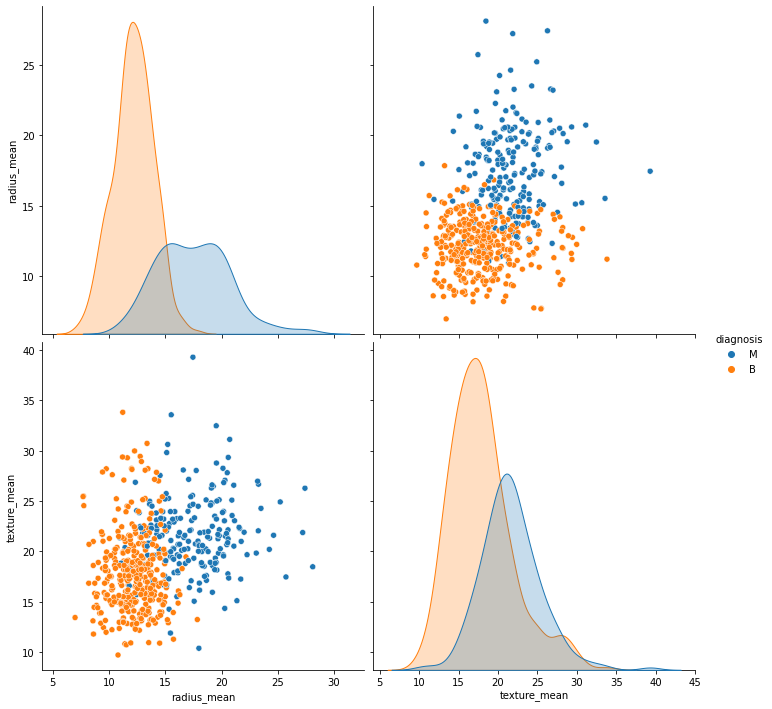

In [14]:
# 8. Create pair plot between two column radius_mean and radius_mean by diagnosis
sns.pairplot(df[["radius_mean",'texture_mean',"diagnosis"]],hue="diagnosis",size=5);

In [15]:
# 9. Select only two feature radius_mean & texture_mean for clustering in new dataset
dataset=df[["radius_mean","texture_mean"]]

In [16]:
dataset

,radius_mean,texture_mean
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [17]:
cols=dataset.columns
cols

Index(['radius_mean', 'texture_mean'], dtype='object')

In [18]:
# 10. Apply scaling on new dataset
from sklearn.preprocessing import MinMaxScaler

In [19]:
model= MinMaxScaler()

In [20]:
dataset=model.fit_transform(dataset)

In [21]:
dataset

array([[0.52103744, 0.0226581 ],
       [0.64314449, 0.27257355],
       [0.60149557, 0.3902604 ],
       ...,
       [0.45525108, 0.62123774],
       [0.64456434, 0.66351031],
       [0.03686876, 0.50152181]])

In [22]:
data=pd.DataFrame(dataset,columns=cols)
data

,radius_mean,texture_mean
0,0.521037,0.022658
1,0.643144,0.272574
2,0.601496,0.390260
3,0.210090,0.360839
4,0.629893,0.156578
...,...,...
564,0.690000,0.428813
565,0.622320,0.626987
566,0.455251,0.621238
567,0.644564,0.663510


In [23]:
from sklearn.cluster import KMeans

In [24]:
model=KMeans(n_clusters=3)

In [25]:
model.fit(data)

KMeans(n_clusters=3)

In [26]:
y_predicted=model.fit_predict(data)
y_predicted

array([2, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2,
       2, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 1, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0,
       0, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1,
       0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 0,
       2, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 2, 2, 2, 0, 1, 2, 1, 2, 0,
       0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 1, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1,
       1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 2, 1, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2,
       2, 0, 1, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0,
       1, 1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2,
       0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1,

In [27]:
data["cluster"]=y_predicted

In [28]:
data

,radius_mean,texture_mean,cluster
0,0.521037,0.022658,2
1,0.643144,0.272574,1
2,0.601496,0.390260,1
3,0.210090,0.360839,0
4,0.629893,0.156578,1
...,...,...,...
564,0.690000,0.428813,1
565,0.622320,0.626987,1
566,0.455251,0.621238,0
567,0.644564,0.663510,1


In [29]:
data1=data[data.cluster==0]
data2=data[data.cluster==1]
data3=data[data.cluster==2]

In [30]:
data1.shape

(155, 3)

In [31]:
data2.shape

(125, 3)

In [32]:
data3.shape

(289, 3)

In [36]:
wcss = model.inertia_
wcss

10.25275149610519

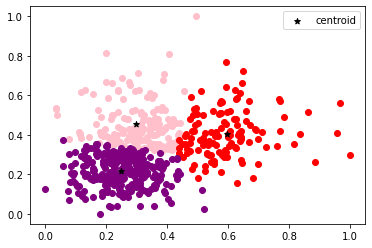

In [37]:
plt.scatter(data1.radius_mean,data1.texture_mean,color='pink')
plt.scatter(data2.radius_mean,data2.texture_mean,color='red')
plt.scatter(data3.radius_mean,data3.texture_mean,color='purple')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()

In [34]:
from sklearn.metrics import silhouette_score

In [35]:
silhouette_score(data,y_predicted)

0.8481963962975686

In [39]:
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i, random_state = 10)
    model.fit(data)
    wcss.append(model.inertia_)

In [40]:
wcss

[440.2603898446034,
 85.75479022413788,
 10.25275149610519,
 8.830524877137645,
 7.514384850554268,
 6.288303316574481,
 5.468556652350497,
 4.750921114118811,
 4.241610199642481,
 3.739784512166912]

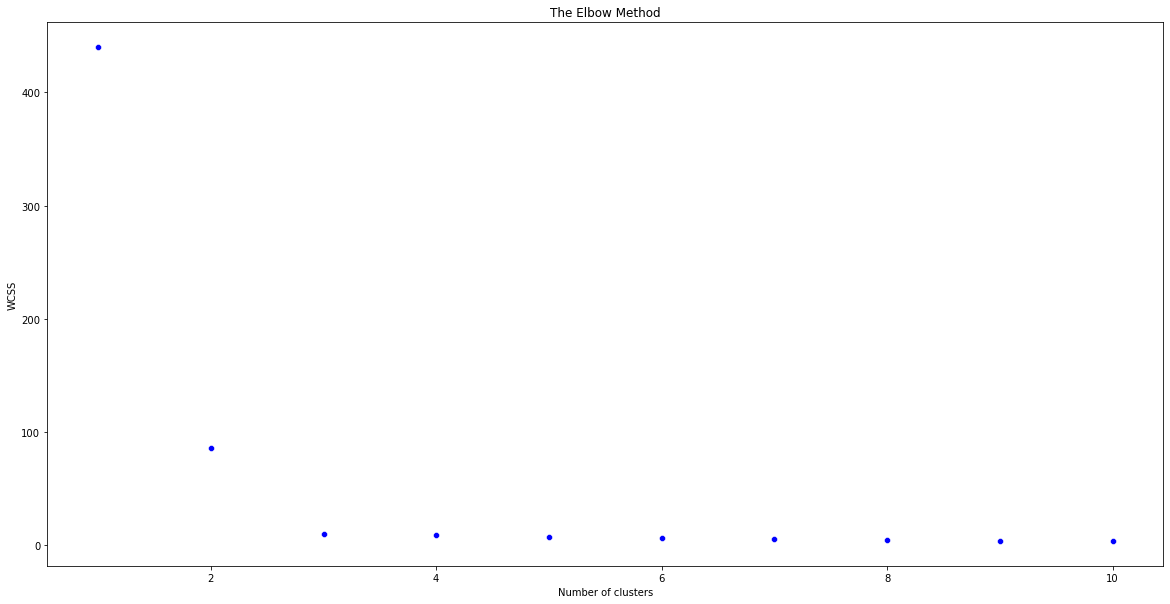

In [43]:
plt.figure(figsize=(20,10))
sns.scatterplot(range(1, 11), wcss,marker='o',color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

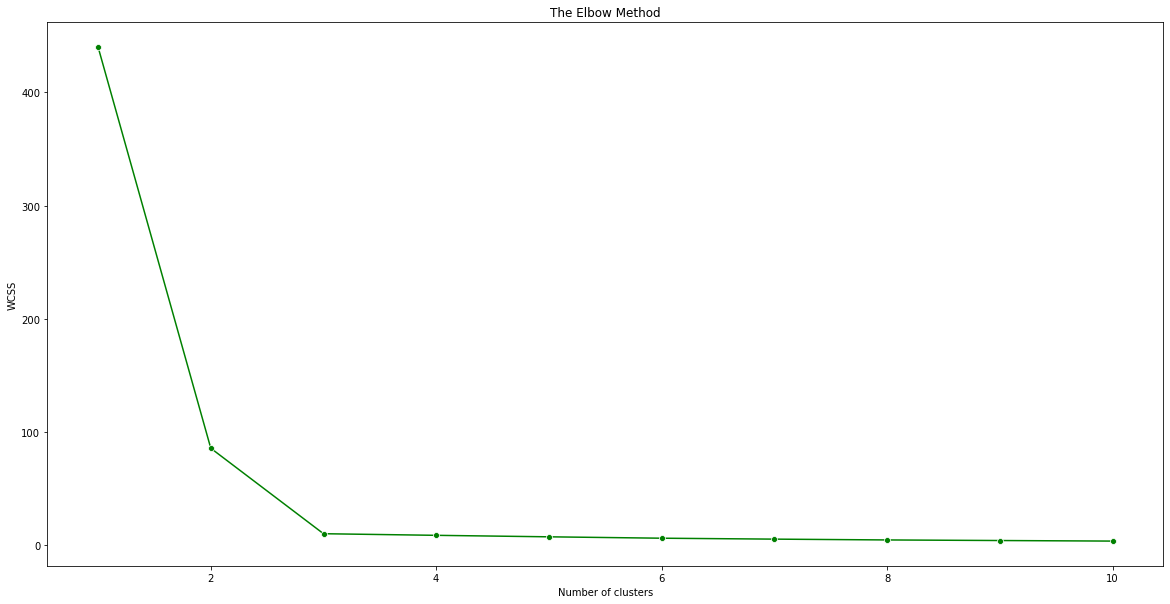

In [55]:
plt.figure(figsize=(20,10))
sns.lineplot(range(1, 11), wcss,marker='o',color='green')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()